In [ ]:
import os
import pandas as pd
import sys
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

from utils_plotting import create_dirs
from data_extraction import load_data_to_dataframe

In [7]:
# ------ Settings ------
# => These variables should be set to the desired settings!

# The files in the directory should have names of the form:
# "{dataset}-factor-{downsample factor}-{any remaining information}"
directory = ''

# The algorithms to consider, needs to match Excel header
algorithms = [
    'Change Vector Analysis',
    'Iterative Reweighted MAD'
]

# ---- The metrics to consider ----

# Given in the Excel file
metrics_precalc = []

# Need to be calculated here -> assumes that the Excel file contains TP, FP, TN and FN
metrics_calc = [
    'OA',
    'Recall',
    'Precision',
    'FMeasure',
    'Kappa'
]

# ---- Plotting ----

# Whether to save histogram plots
plot_hist = False

# Whether to save plots of mean values
plot_mean = False

# Whether to save plots with scattered values
plot_scatter = False

# Whether to save raincloud plots
plot_raincloud = False

# Whether to plot an empirical cumulative distribution
plot_ecum = False

In [ ]:
# Load the data
df = load_data_to_dataframe(directory, metrics_calc)

# Create the directories
metrics = metrics_calc + metrics_precalc
dir_dict = create_dirs(directory, metrics, plot_hist, plot_ecum, plot_mean, plot_scatter, plot_raincloud)

# Global styling configuration
# plt.rcParams.update({'axes.titlesize': 16, 'xtick.labelsize': 14, 'ytick.labelsize': 14, 'axes.labelsize': 14, 'legend.fontsize' : 14})
# plt.grid(True, linestyle='--')

Reference: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

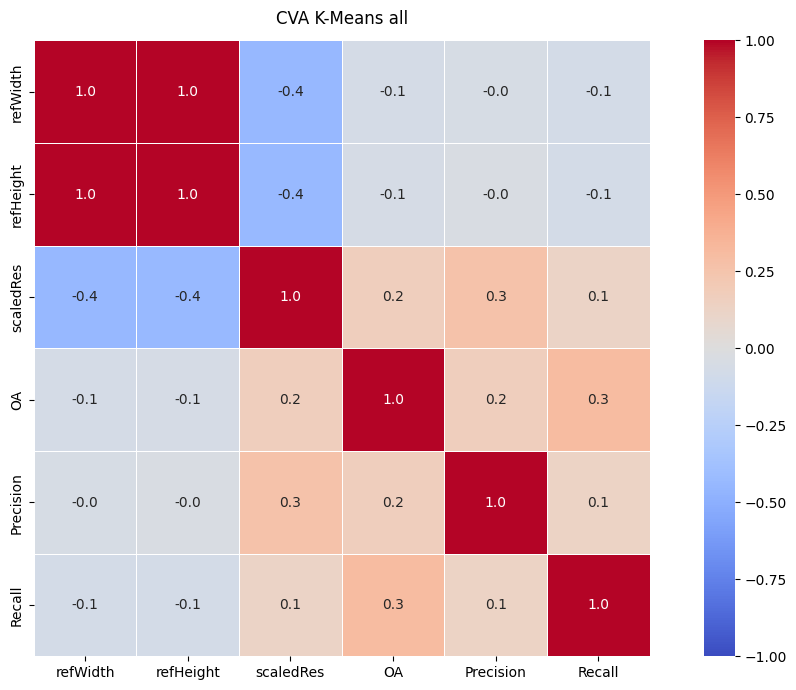

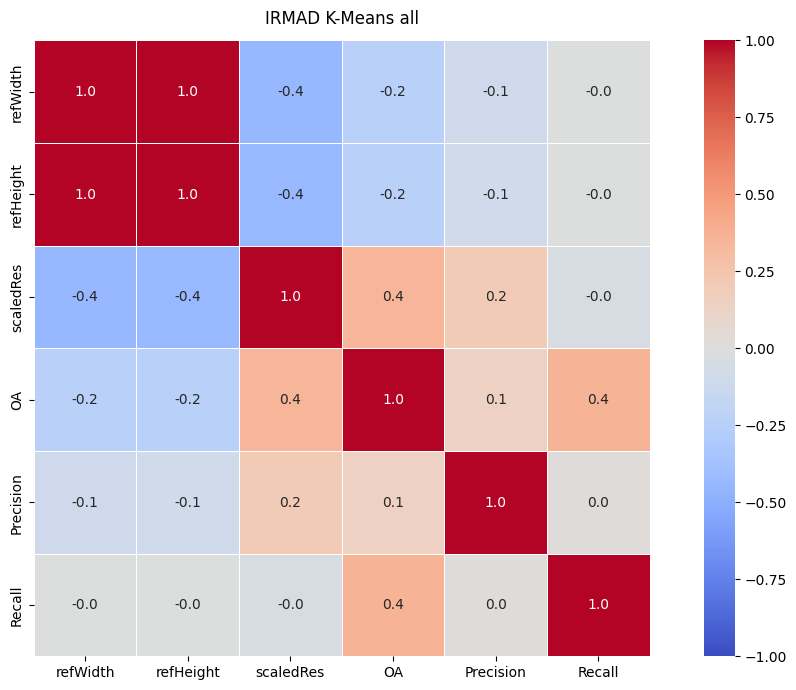

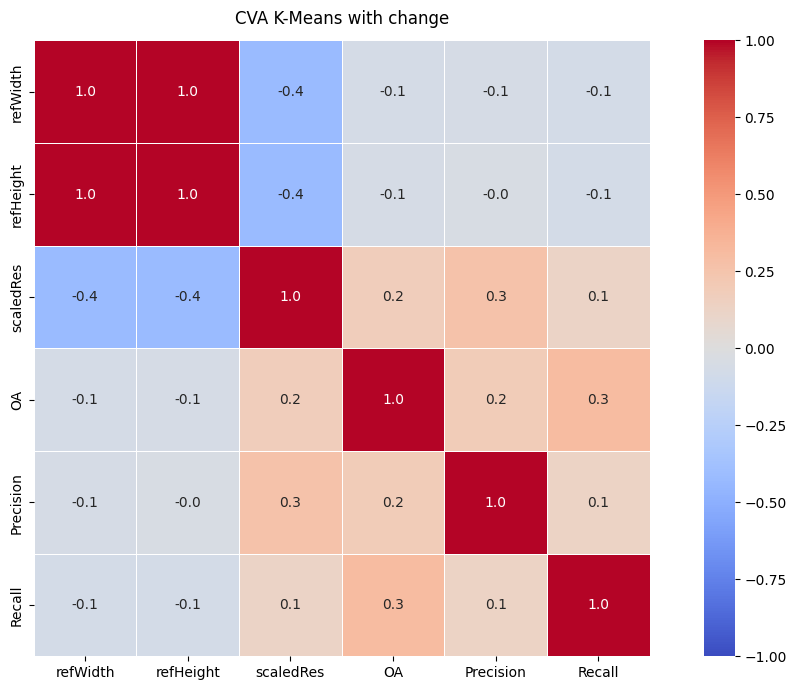

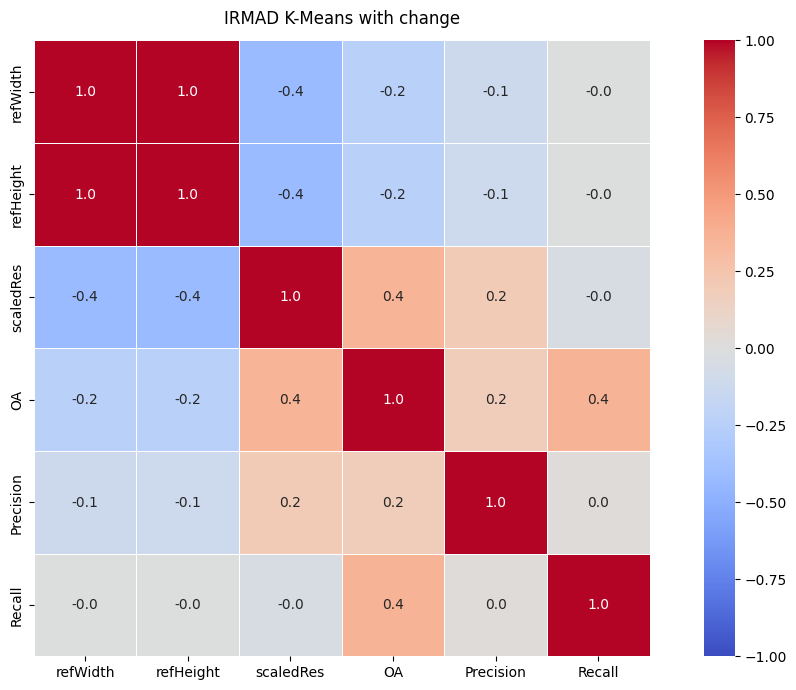

In [33]:
# Plotting
cva_all = df.loc[(df['name'] == 'Change Vector Analysis') & (df['threAlg'] == 'K-Means')]
cva_all = cva_all[['refWidth', 'refHeight', 'scaledRes', 'OA', 'Precision', 'Recall']]
plt.figure(figsize=(14, 8))
heatmap = sns.heatmap(cva_all.corr(), vmin = -1, vmax = 1, center = 0, annot=True, fmt=".1f", square=True, linewidths=.5, cmap = 'coolwarm')
heatmap.set_title('CVA K-Means all', fontdict={'fontsize':12}, pad=12)
plt.savefig('cva-kmeans-all.png')

irmad_all = df.loc[(df['name'] == 'Iterative Reweighted MAD') & (df['threAlg'] == 'K-Means')]
irmad_all = irmad_all[['refWidth', 'refHeight', 'scaledRes', 'OA', 'Precision', 'Recall']]
plt.figure(figsize=(14, 8))
heatmap = sns.heatmap(irmad_all.corr(), vmin = -1, vmax = 1, center = 0, annot=True, fmt=".1f", square=True, linewidths=.5, cmap = 'coolwarm')
heatmap.set_title('IRMAD K-Means all', fontdict={'fontsize':12}, pad=12)
plt.savefig('irmad-kmeans-all.png')

cva_all = df.loc[(df['name'] == 'Change Vector Analysis') & (df['threAlg'] == 'K-Means') & (df['groundP'] > 0)]
cva_all = cva_all[['refWidth', 'refHeight', 'scaledRes', 'OA', 'Precision', 'Recall']]
plt.figure(figsize=(14, 8))
heatmap = sns.heatmap(cva_all.corr(), vmin = -1, vmax = 1, center = 0, annot=True, fmt=".1f", square=True, linewidths=.5, cmap = 'coolwarm')
heatmap.set_title('CVA K-Means with change', fontdict={'fontsize':12}, pad=12)
plt.savefig('cva-kmeans-all-with-change.png')

irmad_all = df.loc[(df['name'] == 'Iterative Reweighted MAD') & (df['threAlg'] == 'K-Means') & (df['groundP'] > 0)]
irmad_all = irmad_all[['refWidth', 'refHeight', 'scaledRes', 'OA', 'Precision', 'Recall']]
plt.figure(figsize=(14, 8))
heatmap = sns.heatmap(irmad_all.corr(), vmin = -1, vmax = 1, center = 0, annot=True, fmt=".1f", square=True, linewidths=.5, cmap = 'coolwarm')
heatmap.set_title('IRMAD K-Means with change', fontdict={'fontsize':12}, pad=12)
plt.savefig('irmad-kmeans-with-change.png')